<a href="https://colab.research.google.com/github/DataAnalytics1/data_insigits/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# New section

In [45]:
from sklearn import preprocessing

In [46]:
import scipy.stats as stats

In [48]:
path="/content/drive/MyDrive/Colab Notebooks/Sample1.xlsx"

In [49]:
df=pd.read_excel(path)

In [50]:
df.columns

Index(['ID', 'A', 'B', 'C', 'D', 'E', 'F', 'M1', 'N1', 'P1', 'Q', 'M2', 'N2',
       'P2', 'M3', 'N3', 'P3'],
      dtype='object')

In [51]:
 df.isnull().sum()

ID    0
A     0
B     0
C     0
D     0
E     0
F     0
M1    0
N1    0
P1    0
Q     0
M2    0
N2    0
P2    0
M3    0
N3    0
P3    0
dtype: int64

In [52]:
df.reset_index(drop=True, inplace=True)

In [55]:
df.drop(["ID"],axis=1,inplace=True)

KeyError: ignored

In [ ]:
df[df=="-"] = np.nan

In [ ]:
df.dropna(how="all",inplace=True)

In [ ]:
df[df=='NaN']=-1

In [ ]:
df.head(10)


,A,B,C,D,E,F,M1,N1,P1,Q,M2,N2,P2,M3,N3,P3
0,27,21,27,31,29,33,5,4,2,3,14,20,6,9,21,9
2,29,21,27,29,23,19,3,0,0,3,10,6,2,0,3,6
3,23,33,15,29,33,35,5,4,2,3,14,20,4,15,21,18
4,35,21,35,35,33,33,5,4,1,3,14,20,4,9,18,18
5,21,19,27,35,29,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21,29,23,19,25,29,2,4,1,3,12,18,2,9,15,0
7,33,31,25,33,33,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,23,27,13,31,27,25,5,4,2,3,10,18,4,15,18,15
9,27,35,21,33,23,33,5,3,2,3,14,20,4,15,18,15
10,27,23,21,33,23,29,3,4,0,3,14,12,2,15,6,6


In [ ]:
df.shape

(898, 16)

In [ ]:
df.isnull().sum()

A       0
B       0
C       0
D       0
E       0
F       0
M1    157
N1    157
P1    157
Q     157
M2    157
N2    157
P2    157
M3    157
N3    157
P3    157
dtype: int64

In [ ]:
df.dtypes

A     object
B     object
C     object
D     object
E     object
F     object
M1    object
N1    object
P1    object
Q     object
M2    object
N2    object
P2    object
M3    object
N3    object
P3    object
dtype: object

In [ ]:
df.describe()

,A,B,C,D,E,F,M1,N1,P1,Q,M2,N2,P2,M3,N3,P3
count,898,898,898,898,898,898,741,741,741,741,741,741,741,741,741,741
unique,14,15,16,15,15,15,6,5,3,4,8,11,4,6,8,7
top,31,35,35,35,31,35,5,4,2,3,14,20,4,15,18,12
freq,175,147,195,355,153,218,320,625,312,649,429,265,425,188,258,164


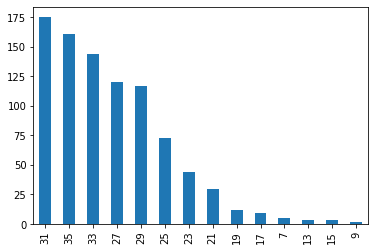

In [ ]:
df['A'].value_counts().plot.bar()

In [ ]:
# convert all columns of DataFrame
#https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma#:~:text=The%20best%20way%20to%20convert,floating%2Dpoint%20numbers%20as%20appropriate.
df = df.apply(pd.to_numeric) # convert all columns of DataFrame

# convert just columns "a" and "b"
df = df.apply(pd.to_numeric)


In [ ]:
df.dtypes

A       int64
B       int64
C       int64
D       int64
E       int64
F       int64
M1    float64
N1    float64
P1    float64
Q     float64
M2    float64
N2    float64
P2    float64
M3    float64
N3    float64
P3    float64
dtype: object

In [ ]:
# Get unique count for each variable
df.nunique()

A     14
B     15
C     16
D     15
E     15
F     15
M1     6
N1     5
P1     3
Q      4
M2     8
N2    11
P2     4
M3     6
N3     8
P3     7
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       898 non-null    int64  
 1   B       898 non-null    int64  
 2   C       898 non-null    int64  
 3   D       898 non-null    int64  
 4   E       898 non-null    int64  
 5   F       898 non-null    int64  
 6   M1      741 non-null    float64
 7   N1      741 non-null    float64
 8   P1      741 non-null    float64
 9   Q       741 non-null    float64
 10  M2      741 non-null    float64
 11  N2      741 non-null    float64
 12  P2      741 non-null    float64
 13  M3      741 non-null    float64
 14  N3      741 non-null    float64
 15  P3      741 non-null    float64
dtypes: float64(10), int64(6)
memory usage: 119.3 KB


# normalize the data attributes
normalized = preprocessing.normalize(df)
print("Normalized Data = ", normalized)

In [ ]:
df

,A,B,C,D,E,F,M1,N1,P1,Q,M2,N2,P2,M3,N3,P3
0,27,21,27,31,29,33,5.0,4.0,2.0,3.0,14.0,20.0,6.0,9.0,21.0,9.0
2,29,21,27,29,23,19,3.0,0.0,0.0,3.0,10.0,6.0,2.0,0.0,3.0,6.0
3,23,33,15,29,33,35,5.0,4.0,2.0,3.0,14.0,20.0,4.0,15.0,21.0,18.0
4,35,21,35,35,33,33,5.0,4.0,1.0,3.0,14.0,20.0,4.0,9.0,18.0,18.0
5,21,19,27,35,29,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,31,33,31,17,5.0,4.0,2.0,3.0,14.0,16.0,4.0,12.0,18.0,15.0
996,21,23,27,29,23,33,5.0,4.0,2.0,3.0,14.0,16.0,6.0,12.0,6.0,3.0
997,29,33,29,35,29,35,5.0,4.0,2.0,3.0,14.0,18.0,4.0,12.0,18.0,15.0
998,27,29,23,31,25,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.replace(np.nan,-1,inplace=True)
df

,A,B,C,D,E,F,M1,N1,P1,Q,M2,N2,P2,M3,N3,P3
0,27,21,27,31,29,33,5.0,4.0,2.0,3.0,14.0,20.0,6.0,9.0,21.0,9.0
2,29,21,27,29,23,19,3.0,0.0,0.0,3.0,10.0,6.0,2.0,0.0,3.0,6.0
3,23,33,15,29,33,35,5.0,4.0,2.0,3.0,14.0,20.0,4.0,15.0,21.0,18.0
4,35,21,35,35,33,33,5.0,4.0,1.0,3.0,14.0,20.0,4.0,9.0,18.0,18.0
5,21,19,27,35,29,21,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,31,33,31,17,5.0,4.0,2.0,3.0,14.0,16.0,4.0,12.0,18.0,15.0
996,21,23,27,29,23,33,5.0,4.0,2.0,3.0,14.0,16.0,6.0,12.0,6.0,3.0
997,29,33,29,35,29,35,5.0,4.0,2.0,3.0,14.0,18.0,4.0,12.0,18.0,15.0
998,27,29,23,31,25,35,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


###data visualization


In [ ]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'M1', 'N1', 'P1', 'Q', 'M2', 'N2', 'P2',
       'M3', 'N3', 'P3'],
      dtype='object')

In [ ]:
feat_t1= ["A", "B","C","D","E"]
feat_t2 = ['M1', 'N1', 'P1', 'Q', 'M2', 'N2', 'P2','M3', 'N3', 'P3']

In [ ]:
list(enumerate(feat_t1))

[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E')]

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Sports Watch Data", fontdict = font1)
plt.xlabel("Average Pulse", fontdict = font2)
plt.ylabel("Calorie Burnage", fontdict = font2)


In [ ]:
def plot_hist(dataframe, column, ):
    #fig, axs = plt.subplots(2,3)
    plt.figure(figsize=(10,10))
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    for i in enumerate(column):
        plt.subplot(5,5,i[0]+1)
        plt.hist(dataframe[i[1]])
    plt.show()


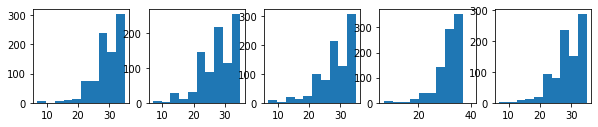

In [ ]:
plot_hist(df,feat_t1)

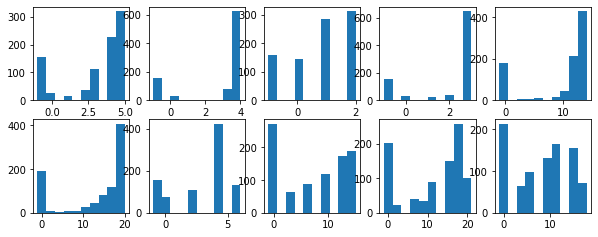

In [ ]:
plot_hist(df,feat_t2)

In [ ]:
def plot_bar(dataframe, column, ):
    plt.figure(figsize=(10,20))
    for i in enumerate(column):
        plt.subplot(3,2,i[0]+1)
        plt.bar(dataframe[i[1]],height=20,width=2)
    plt.show()


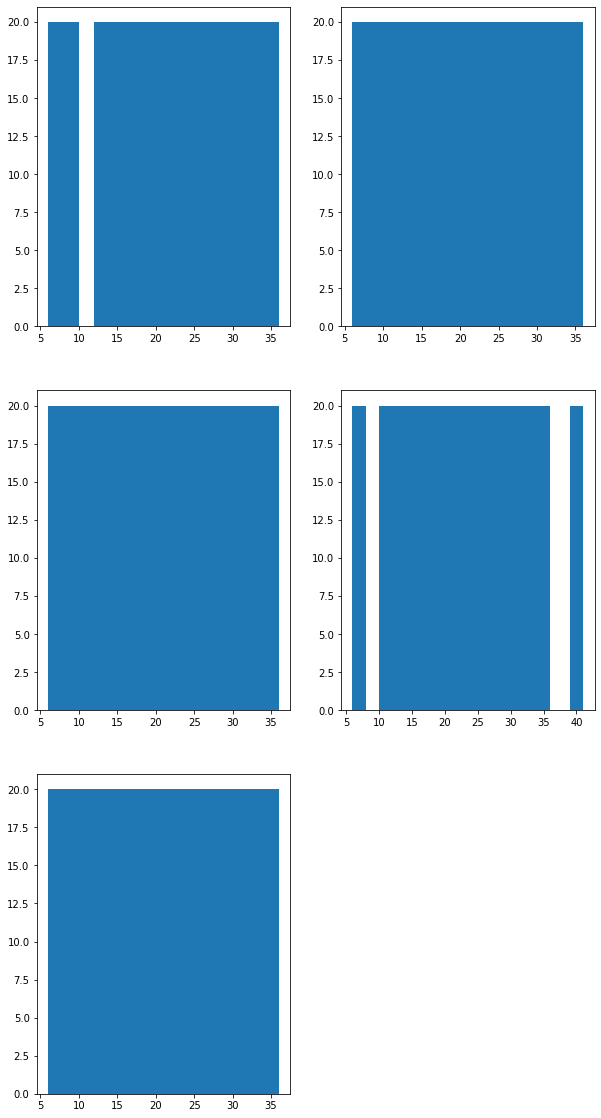

In [ ]:
plot_bar(df,feat_t1)

In [ ]:
def plot_box(dataframe, column, ):
    plt.figure(figsize=(10,20))
    for i in enumerate(column):
        plt.subplot(3,2,i[0]+1)
        plt.boxplot(dataframe[i[1]])
    plt.show()


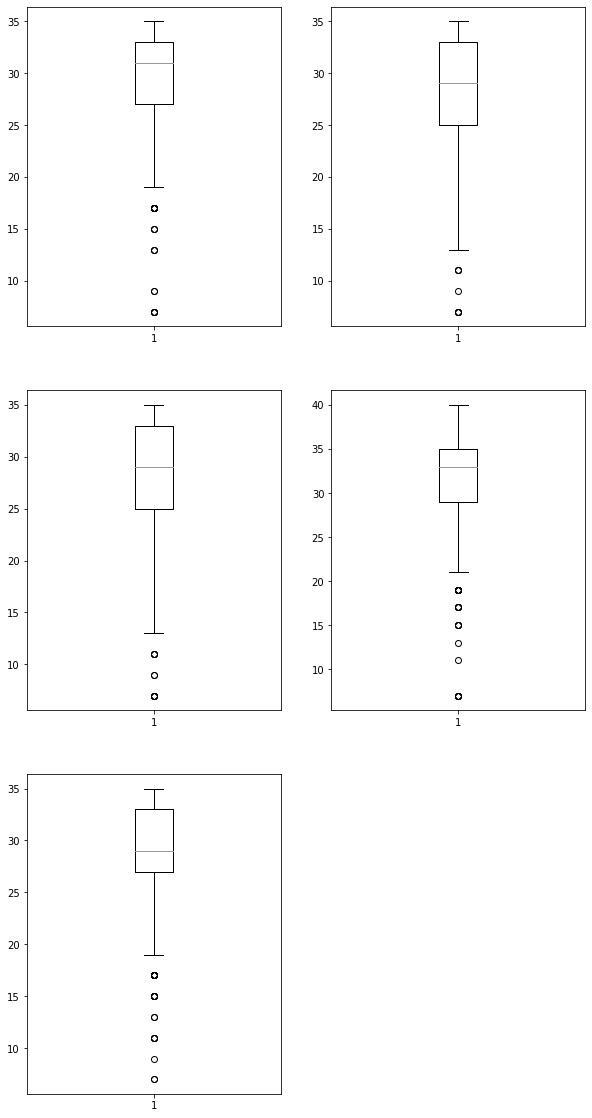

In [ ]:
plot_box(df,feat_t1)

In [ ]:
# evaluate model performance with outliers removed using isolation forest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest

https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/

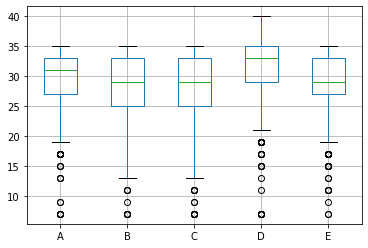

In [ ]:
df.boxplot(column=feat_t1)

In [ ]:
df.describe()

,A,B,C,D,E,F,M1,N1,P1,Q,M2,N2,P2,M3,N3,P3
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.00000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,29.432071,27.879733,28.753898,31.408686,29.020045,29.683742,3.097996,2.883073,0.837416,2.10245,10.047884,13.034521,2.831849,7.224944,11.775056,8.230512
std,4.821953,5.691925,5.719435,4.683876,4.971674,5.235181,2.205035,1.949966,1.087203,1.56700,5.756770,7.920447,2.331408,6.112706,7.843833,6.322729
min,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,27.000000,25.000000,25.000000,29.000000,27.000000,27.000000,2.000000,3.000000,0.000000,2.00000,10.000000,10.000000,0.000000,0.000000,6.000000,3.000000
50%,31.000000,29.000000,29.000000,33.000000,29.000000,31.000000,4.000000,4.000000,1.000000,3.00000,12.000000,16.000000,4.000000,9.000000,15.000000,9.000000
75%,33.000000,33.000000,33.000000,35.000000,33.000000,33.000000,5.000000,4.000000,2.000000,3.00000,14.000000,20.000000,4.000000,12.000000,18.000000,15.000000
max,35.000000,35.000000,35.000000,40.000000,35.000000,35.000000,5.000000,4.000000,2.000000,3.00000,14.000000,20.000000,6.000000,15.000000,21.000000,18.000000


In [ ]:
df

,A,B,C,D,E,F,M1,N1,P1,Q,M2,N2,P2,M3,N3,P3
0,27,21,27,31,29,33,5.0,4.0,2.0,3.0,14.0,20.0,6.0,9.0,21.0,9.0
2,29,21,27,29,23,19,3.0,0.0,0.0,3.0,10.0,6.0,2.0,0.0,3.0,6.0
3,23,33,15,29,33,35,5.0,4.0,2.0,3.0,14.0,20.0,4.0,15.0,21.0,18.0
4,35,21,35,35,33,33,5.0,4.0,1.0,3.0,14.0,20.0,4.0,9.0,18.0,18.0
5,21,19,27,35,29,21,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,31,33,31,17,5.0,4.0,2.0,3.0,14.0,16.0,4.0,12.0,18.0,15.0
996,21,23,27,29,23,33,5.0,4.0,2.0,3.0,14.0,16.0,6.0,12.0,6.0,3.0
997,29,33,29,35,29,35,5.0,4.0,2.0,3.0,14.0,18.0,4.0,12.0,18.0,15.0
998,27,29,23,31,25,35,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
duplicate = df.duplicated()
duplicate.sum()
df[duplicate]

,A,B,C,D,E,F,M1,N1,P1,Q,M2,N2,P2,M3,N3,P3
132,35,35,35,35,35,35,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
199,35,35,35,35,35,35,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
205,35,35,35,35,35,35,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
244,35,35,35,35,35,35,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
265,35,35,35,35,35,35,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
417,35,35,35,35,35,35,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
483,35,35,35,35,35,35,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
546,7,7,7,7,7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,35,35,35,35,35,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,35,35,35,35,35,35,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
duplicate = df.duplicated()
duplicate.sum()
#df[duplicate]

0

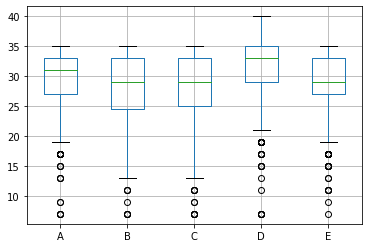

In [ ]:
def box_plot_with_outlier(df,colu):
    df.boxplot(column=colu)
box_plot_with_outlier(df,feat_t1)

outliers are need to be stored in an list

In [ ]:
def remove_outlier(col):
    sorted(col)
    q1,q3 = col.quantile([0.25, 0.75])
    IQR =q3-q1
    lower_range = q1-(1.5+IQR)
    upper_range = q3+(1.5+IQR)
    print(lower_range, upper_range,IQR)
    return lower_range, upper_range

outliers removing function

In [ ]:
def max_min_mean(df,col):
    return min(df[col]),max(df[col]),np.std(df[col])
def outlier_fix(df, colu):
    for i in colu:
        low, upp = remove_outlier(df[i])
        df[i] = np.where(df[i]>upp , upp, df[i])
        df[i] = np.where(df[i]<low , low, df[i])
def box_plot_without_outlier(df,colu):
    df.boxplot(column=colu)

19.5 40.5 6.0
14.5 43.0 8.5
15.5 42.5 8.0
21.5 42.5 6.0
19.5 40.5 6.0


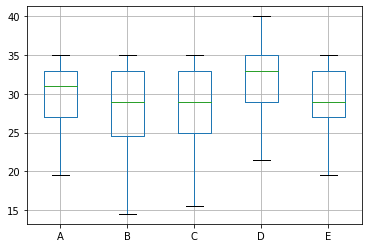

In [ ]:
outlier_fix(df,feat_t1)
box_plot_without_outlier(df,feat_t1)


low, upp ,iqr= remove_outlier(df["A"])
df["A"] = np.where(df["A"]>upp , upp, df['A'])
df["A"] = np.where(df["A"]<low , low, df['A'])

df.boxplot(column=["A"])

In [ ]:
max_min_mean(df,"A")

(19.5, 35.0, 4.286931050010311)

In [ ]:
print(df.var(),"\nvar")
print(df.std(),"\nstd")


A     18.398591
B     29.706745
C     28.528031
D     15.667388
E     20.140386
F     26.870567
M1     4.704154
N1     3.651702
P1     1.155649
Q      2.361796
M2    31.874687
N2    60.796062
P2     5.316747
M3    36.980485
N3    60.109135
P3    39.371743
dtype: float64 
var
A     4.289358
B     5.450389
C     5.341164
D     3.958205
E     4.487804
F     5.183683
M1    2.168906
N1    1.910943
P1    1.075011
Q     1.536814
M2    5.645767
N2    7.797183
P2    2.305807
M3    6.081158
N3    7.753008
P3    6.274691
dtype: float64 
std


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


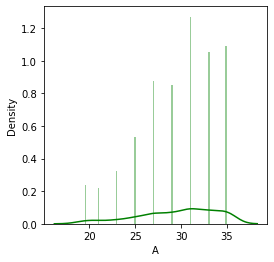

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df['A'], color='g', bins=100, hist_kws={'alpha': 0.4});

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


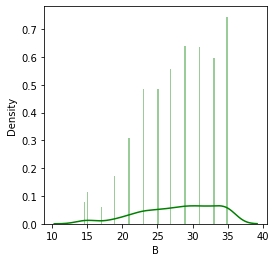

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df['B'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 46.7MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import sweetviz 

In [ ]:
df_test1 = df[feat_t1]
df_test2 = df[feat_t2]

In [ ]:
my_report_test1 = sweetviz.analyze([df_test1,"df_test1"])
my_report_test2 = sweetviz.analyze([df_test2,"df_test2"])

                                             |          | [  0%]   00:00 -> (? left)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report_cmp = sweetviz.compare([df_test1,"df_test1"],[df_test2,"df_test2"])

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report_test1.show_html("report_1.html")
my_report_test2.show_html("report_2.html")
my_report_cmp.show_html("report_cmp.html")


Report report_1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Report report_2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Report report_cmp.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.corr()

,A,B,C,D,E,F,M1,N1,P1,Q,M2,N2,P2,M3,N3,P3
A,1.000000,0.583560,0.580643,0.539420,0.550195,0.545868,0.092625,0.098191,0.085378,0.117969,0.120098,0.111401,0.111298,0.087392,0.106630,0.103313
B,0.583560,1.000000,0.532486,0.446335,0.519953,0.577447,0.058296,0.052719,0.041853,0.063527,0.068197,0.100121,0.064721,0.053832,0.106964,0.067965
C,0.580643,0.532486,1.000000,0.488487,0.576035,0.494677,0.062563,0.093812,0.051614,0.089914,0.104516,0.078036,0.078789,0.027180,0.098400,0.042131
D,0.539420,0.446335,0.488487,1.000000,0.542608,0.581533,0.158731,0.158797,0.122409,0.159738,0.176878,0.161632,0.181127,0.164296,0.157048,0.163239
E,0.550195,0.519953,0.576035,0.542608,1.000000,0.554379,0.052281,0.091567,0.060405,0.082574,0.094733,0.083587,0.068776,0.037686,0.101059,0.037743
F,0.545868,0.577447,0.494677,0.581533,0.554379,1.000000,0.120564,0.126859,0.086358,0.121210,0.143627,0.137137,0.109490,0.109651,0.144508,0.077506
M1,0.092625,0.058296,0.062563,0.158731,0.052281,0.120564,1.000000,0.896973,0.746916,0.882762,0.907111,0.867449,0.756914,0.659500,0.803259,0.714640
N1,0.098191,0.052719,0.093812,0.158797,0.091567,0.126859,0.896973,1.000000,0.784668,0.907814,0.948034,0.901058,0.786398,0.652787,0.828503,0.722777
P1,0.085378,0.041853,0.051614,0.122409,0.060405,0.086358,0.746916,0.784668,1.000000,0.763314,0.783824,0.766741,0.725213,0.634349,0.719730,0.689933
Q,0.117969,0.063527,0.089914,0.159738,0.082574,0.121210,0.882762,0.907814,0.763314,1.000000,0.901400,0.838163,0.740327,0.632420,0.768995,0.685288


In [ ]:
df["A"].max()




35.0

In [ ]:
df.shape

(884, 16)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()


In [ ]:
df_scaled= std.fit_transform(df.values.reshape(-1,1))
df_scaled.shape

(14144, 1)

In [ ]:
#df_scaled

In [ ]:
#

In [ ]:
plt.figure(figsize=(10,10))
for i in enumerate(feat):
    plt.subplot(3,3,i[0]+1)
    #sns.displot()
    df[i[1]].value_counts().plot.bar()
    

NameError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
corr_mat = df[feat_t1].corr()
sns.heatmap(data=corr_mat, annot=True)

In [ ]:
corr_mat = df[feat_t2].corr()
sns.heatmap(data=corr_mat, annot=True)

In [ ]:
plt.figure(figsize=(9,8))
sns.displot(df[feat_t2],color="g")

In [ ]:
df[feat_t1].hist(figsize=(5,5), bins=10,xlabelsize=8,ylabelsize=8)

In [ ]:
df_num = df.corr()["A"][:-1]
g_feat = df_num[abs(df_num)>0.5].sort_values(ascending =False)
g_feat

In [ ]:
plt.hist(df["A"])
plt.show() 

df["A"].plot().hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


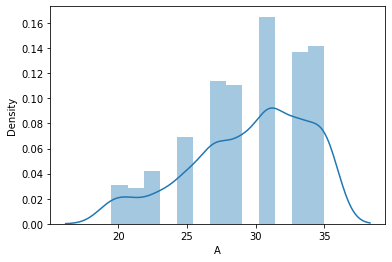

In [ ]:
sns.distplot(df['A'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


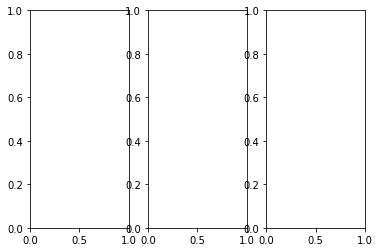

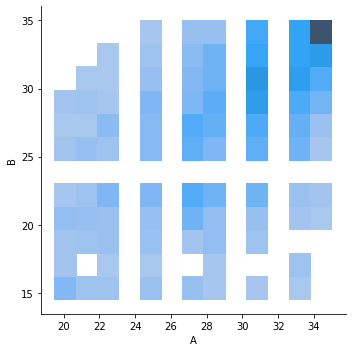

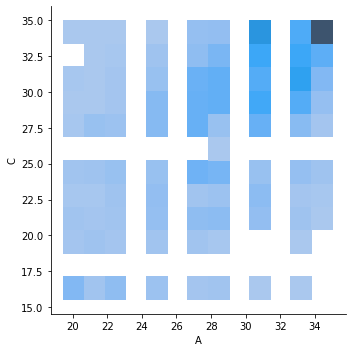

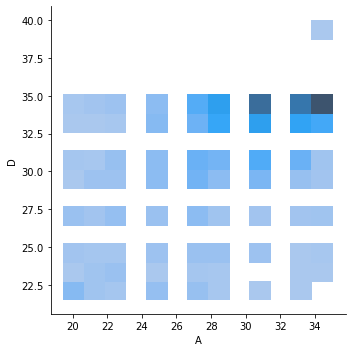

In [ ]:
fig, axs = plt.subplots(ncols=3)
sns.displot(x='A', y='B', data=df, ax=axs[0])
sns.displot(x='A', y='C', data=df, ax=axs[1])
sns.displot(x='A',y='D', data=df, ax=axs[2])

In [ ]:
for j in enumerate(feat1):
    plt.subplot(3,3,j[0]+1)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(df[j[1]] )
    ax.set_xlabel(j[1])
    ax.set_ylabel(j[1])
    plt.show()

NameError: ignored